In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,precision_recall_curve,auc
from sklearn.metrics import confusion_matrix,roc_curve,precision_recall_curve, average_precision_score, precision_recall_fscore_support

In [5]:
import sys
print(sys.executable)

C:\Users\hp\AppData\Local\Programs\Python\Python311\python.exe


In [6]:
df = pd.read_csv("creditcard.csv")

In [7]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154462,101652.0,-4.478346,3.419199,-0.765397,-0.289485,-1.890094,1.000385,-2.949477,-5.125255,2.685246,...,6.333258,-1.214279,0.692490,-0.224044,0.000102,-0.125245,0.006476,0.295879,49.00,0
149041,90496.0,-2.833355,2.378686,-1.024702,-2.386172,2.621030,3.702669,0.269206,0.272754,4.315920,...,-0.852392,-0.947504,0.020919,0.461932,0.064012,-0.504284,-1.100716,-1.086387,0.68,0
88798,62300.0,-0.345699,0.373345,1.734489,-0.088639,0.003138,0.094501,0.022867,0.060540,0.133075,...,0.117448,0.569168,-0.269961,-0.305520,-0.245655,1.227851,0.090250,0.127333,9.88,0
272724,165234.0,1.896326,0.509198,-0.821029,3.751244,0.350186,-0.447463,0.296046,-0.165146,-0.999808,...,0.237662,0.609270,0.059569,-0.047569,0.072124,0.135984,-0.053102,-0.050519,27.25,0
242417,151483.0,1.960452,-0.603808,-0.424743,0.301552,-0.672197,0.043767,-0.880684,0.255119,1.209069,...,0.222901,0.724382,0.182107,0.783419,-0.293618,0.563256,-0.041791,-0.055564,7.35,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


In [14]:
fraud_percentage = (class_counts[1] / len(df)) * 100
print(f"Fraud percentage: {fraud_percentage:.4f}%")

Fraud percentage: 0.1727%


# Fraud vs Non-Fraud Amount Distribution

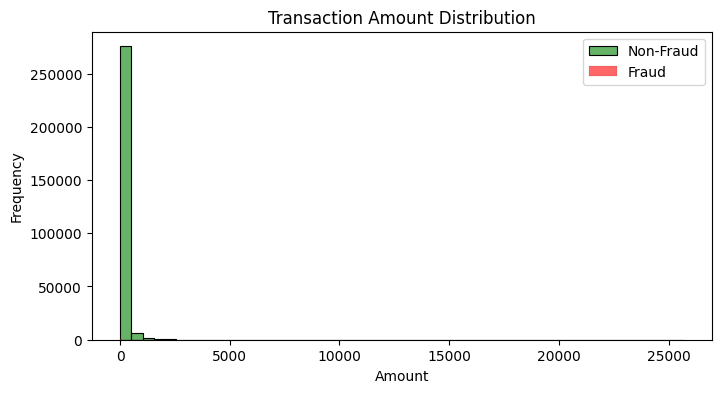

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.6)
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

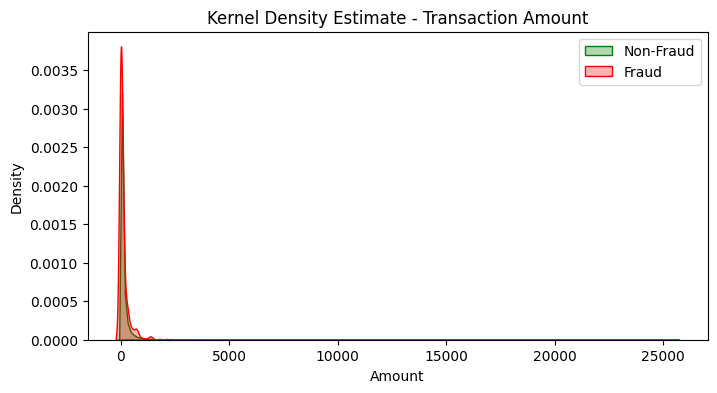

In [16]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Class']==0]['Amount'], color='green', label='Non-Fraud', fill=True, alpha=0.3)
sns.kdeplot(df[df['Class']==1]['Amount'], color='red', label='Fraud', fill=True, alpha=0.3)
plt.title('Kernel Density Estimate - Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

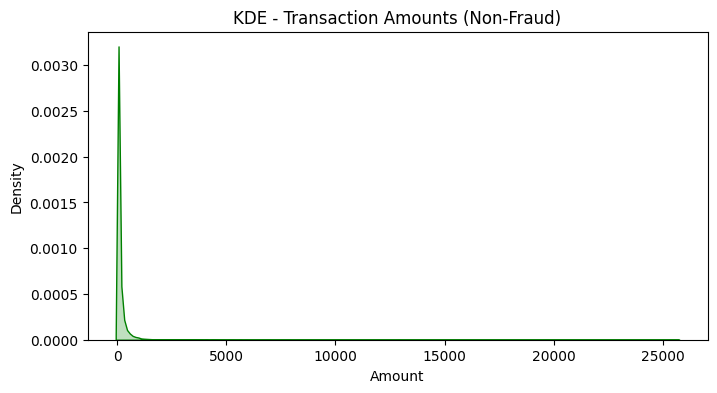

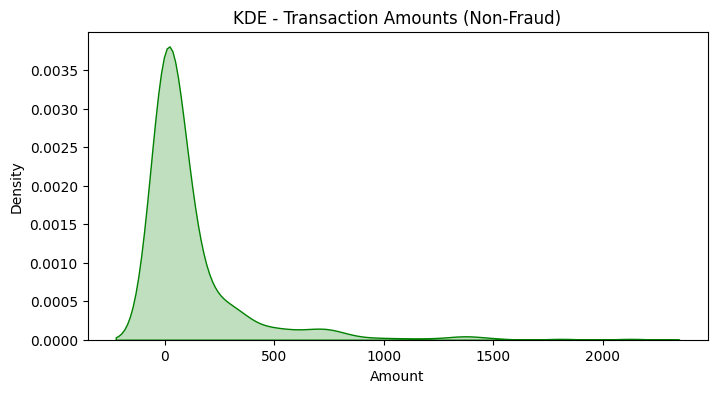

In [17]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Class']==0]['Amount'], color='green', fill=True)
plt.title('KDE - Transaction Amounts (Non-Fraud)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Class']==1]['Amount'], color='green', fill=True)
plt.title('KDE - Transaction Amounts (Non-Fraud)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

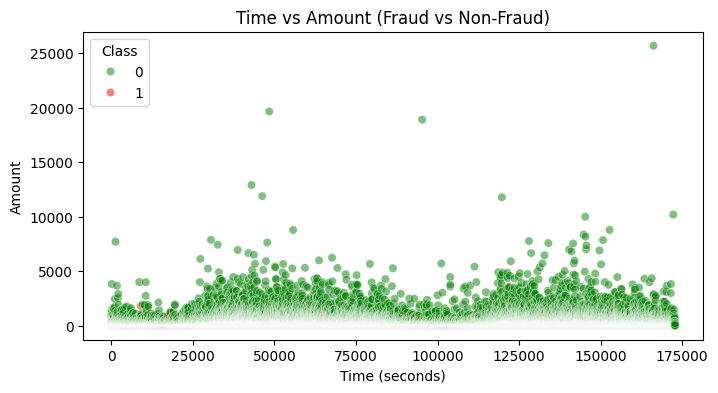

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette=['green','red'], alpha=0.5)
plt.title('Time vs Amount (Fraud vs Non-Fraud)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.show()


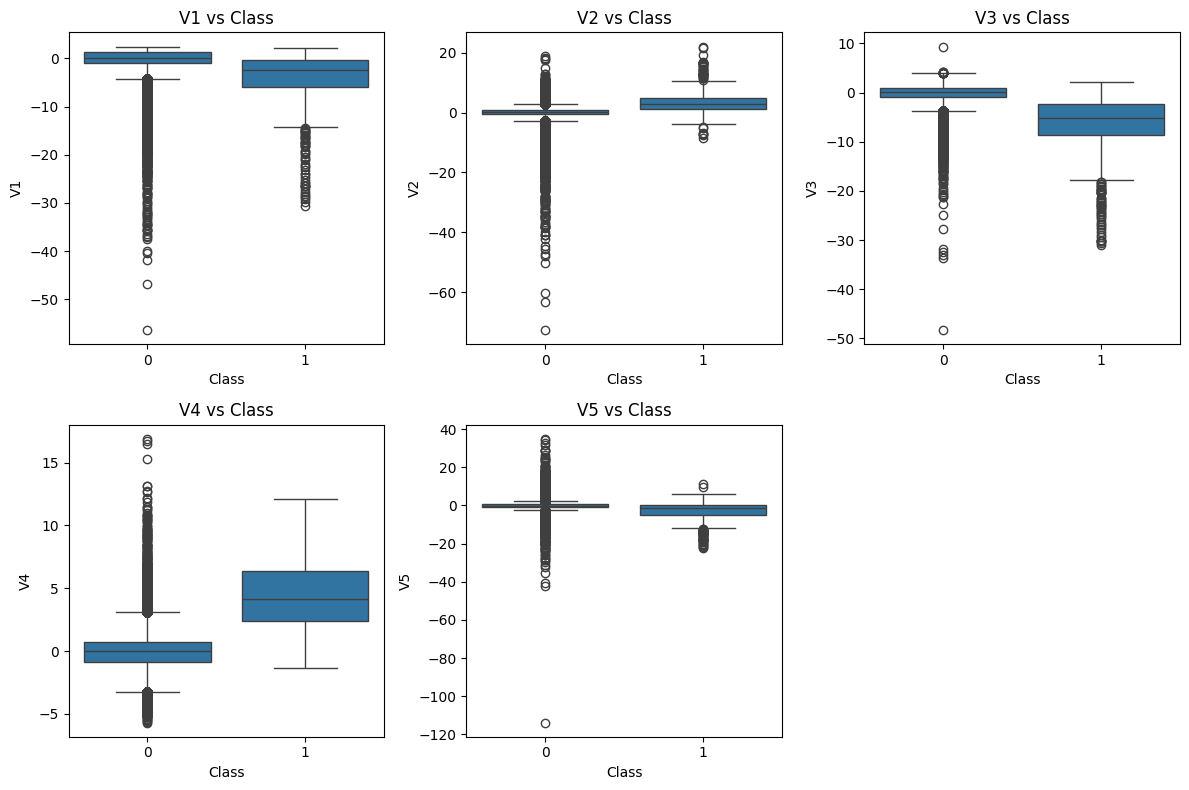

In [19]:
features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(12,8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()


In [20]:
scaler = RobustScaler()
df[['Amount','Time']] = scaler.fit_transform(df[['Amount','Time']])

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


# Random Under-Sampling

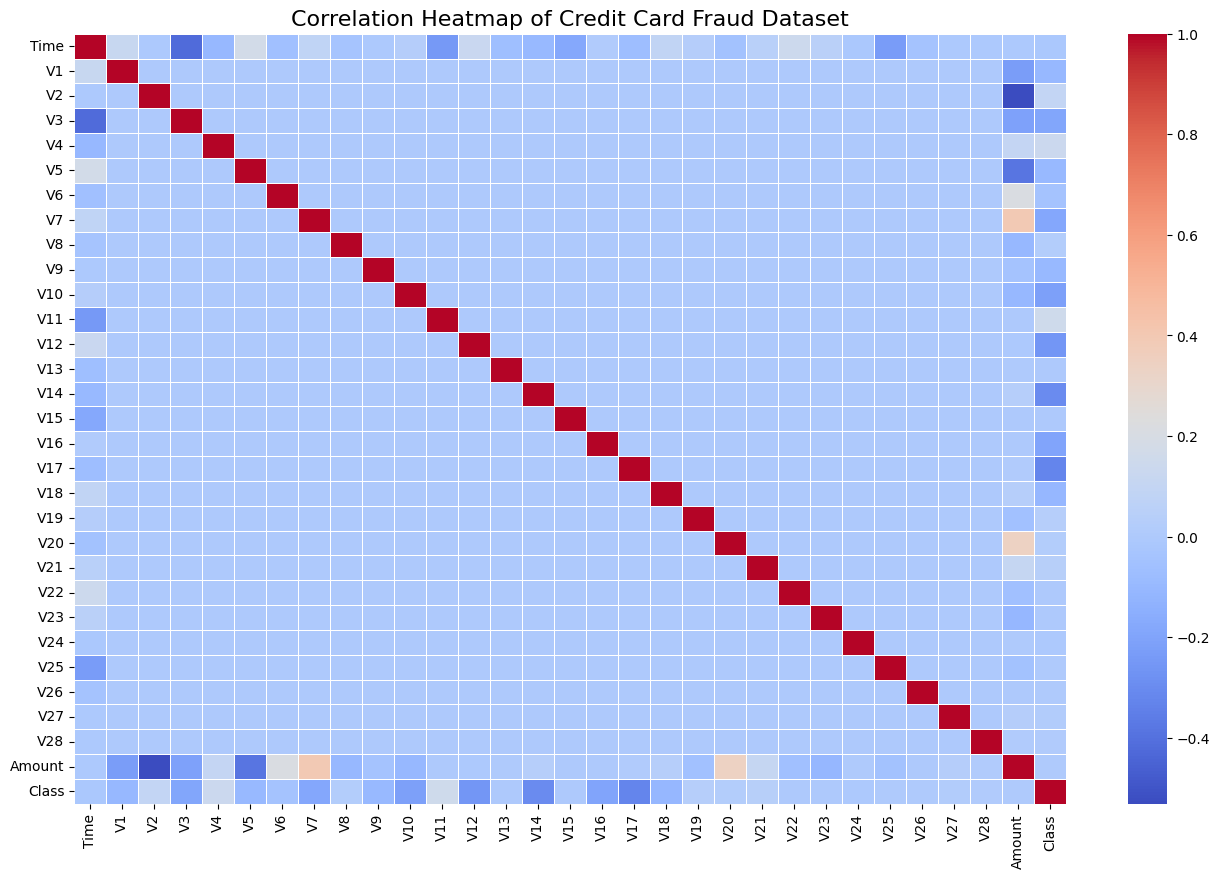

In [22]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Credit Card Fraud Dataset', fontsize=16)
plt.show()

Correlation of features with Class:
V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V11       0.154876
V4        0.133447
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V2        0.091289
V6       -0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time     -0.012323
V28       0.009536
V24      -0.007221
Amount    0.005632
V13      -0.004570
V26       0.004455
V15      -0.004223
V25       0.003308
V23      -0.002685
V22       0.000805
Name: Class, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_2536\2177458204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_class.values, y=correlation_with_class.index, palette="viridis")


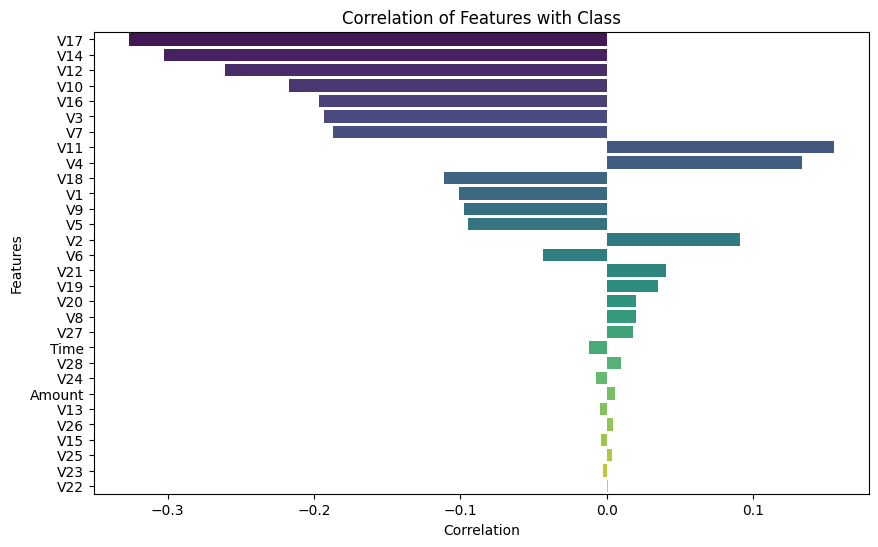

In [23]:
# Correlation of all features with Class
correlation_with_class = df.corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)

print("Correlation of features with Class:")
print(correlation_with_class)

plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_class.values, y=correlation_with_class.index, palette="viridis")
plt.title("Correlation of Features with Class")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

In [24]:
subSample_fraud = df[df['Class']==1]
fraud_count = len(subSample_fraud)

subSample_nonfraud = df[df['Class']==0].sample(n=fraud_count, random_state = 42)

subSample = pd.concat([subSample_fraud,subSample_nonfraud],axis=0)
subSample = subSample.sample(frac=1).reset_index(drop=True)

In [25]:
subSample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.408405,-1.957851,3.677193,-2.530447,0.703471,0.699653,-1.809266,1.413006,-0.774911,2.860030,...,-0.706856,-0.348311,0.140182,0.086107,0.044086,-0.477411,1.048667,-0.042586,-0.294977,0
1,0.553637,2.034841,-0.268638,-1.169341,0.105110,-0.030076,-0.533218,-0.057155,-0.154117,0.831379,...,0.113967,0.662357,-0.020104,-0.259289,0.231869,0.193427,-0.026246,-0.075328,-0.293440,0
2,-0.496011,1.159605,0.403626,0.523389,2.493116,0.348971,0.832643,-0.052335,0.103184,-0.344919,...,-0.087523,0.028621,-0.176313,-0.716244,0.706560,0.154336,0.031386,0.012514,-0.143785,0
3,-0.484005,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,0.040523,1
4,-0.582173,1.125711,0.234987,1.525035,2.716260,-0.832368,0.134716,-0.579474,0.182346,0.161605,...,-0.090272,-0.120623,0.049578,0.365123,0.285938,-0.041929,0.040835,0.034898,-0.307413,0


In [26]:
(subSample['Class']).value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

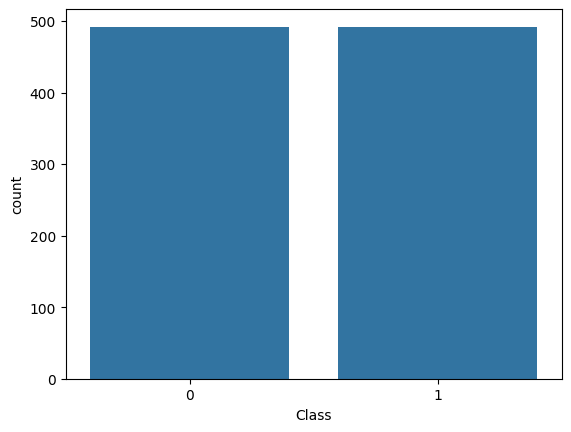

In [27]:
sns.countplot(data=subSample,x='Class')

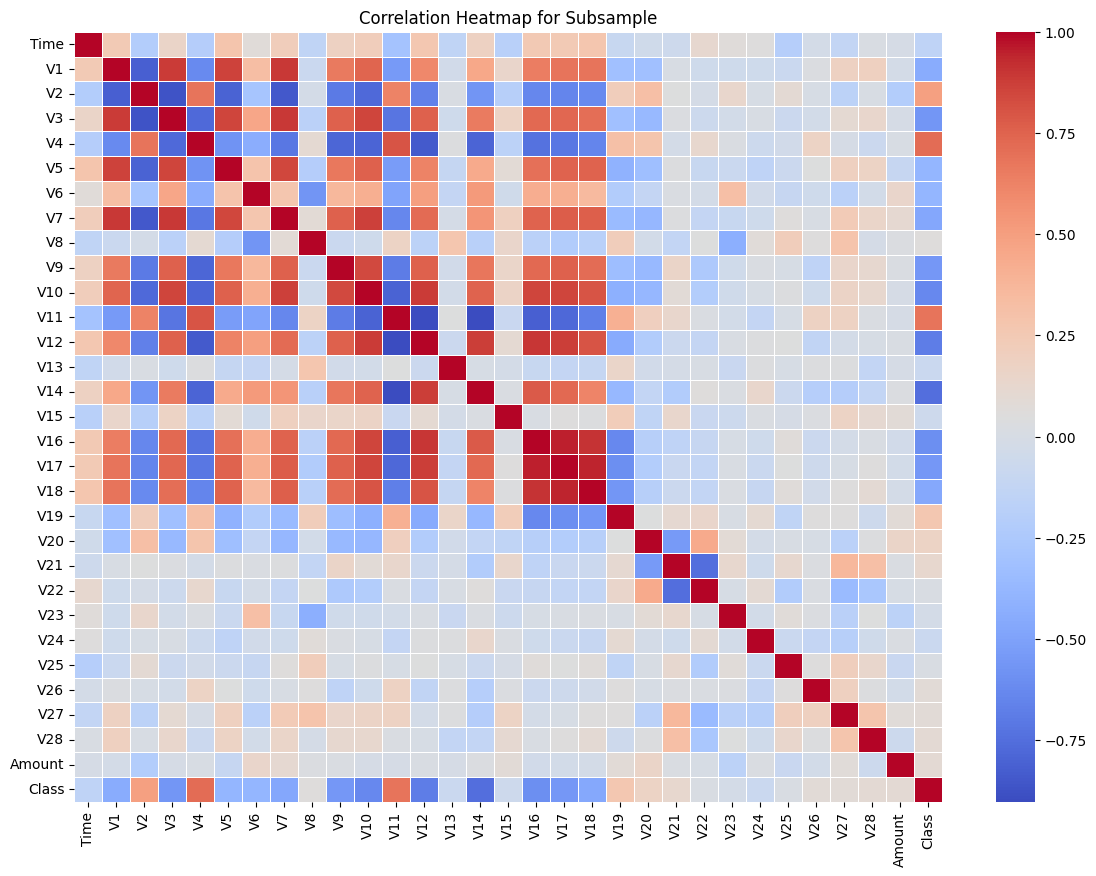

In [28]:
corr_matrix = subSample.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap for Subsample')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2536\1186846003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")


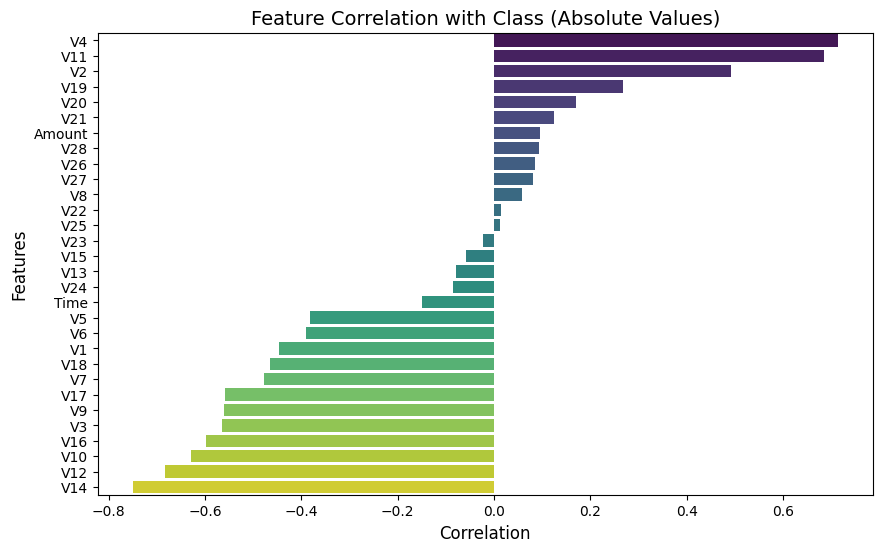

In [29]:
class_corr = subSample.corr()['Class'].drop('Class')

sorted_corr = class_corr.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette="viridis")
plt.title("Feature Correlation with Class (Absolute Values)", fontsize=14)
plt.xlabel("Correlation", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

In [30]:
# Top 5 negatively correlated (excluding 'Class' itself)
top_negative = sorted_corr.head(5)  # first 6 because 'Class' will be there
# Top 5 positively correlated
top_positive = sorted_corr.tail(5)
features_to_check = list(top_negative.index) + list(top_positive.index)
print("Features to check:", features_to_check)

Features to check: ['V4', 'V11', 'V2', 'V19', 'V20', 'V3', 'V16', 'V10', 'V12', 'V14']


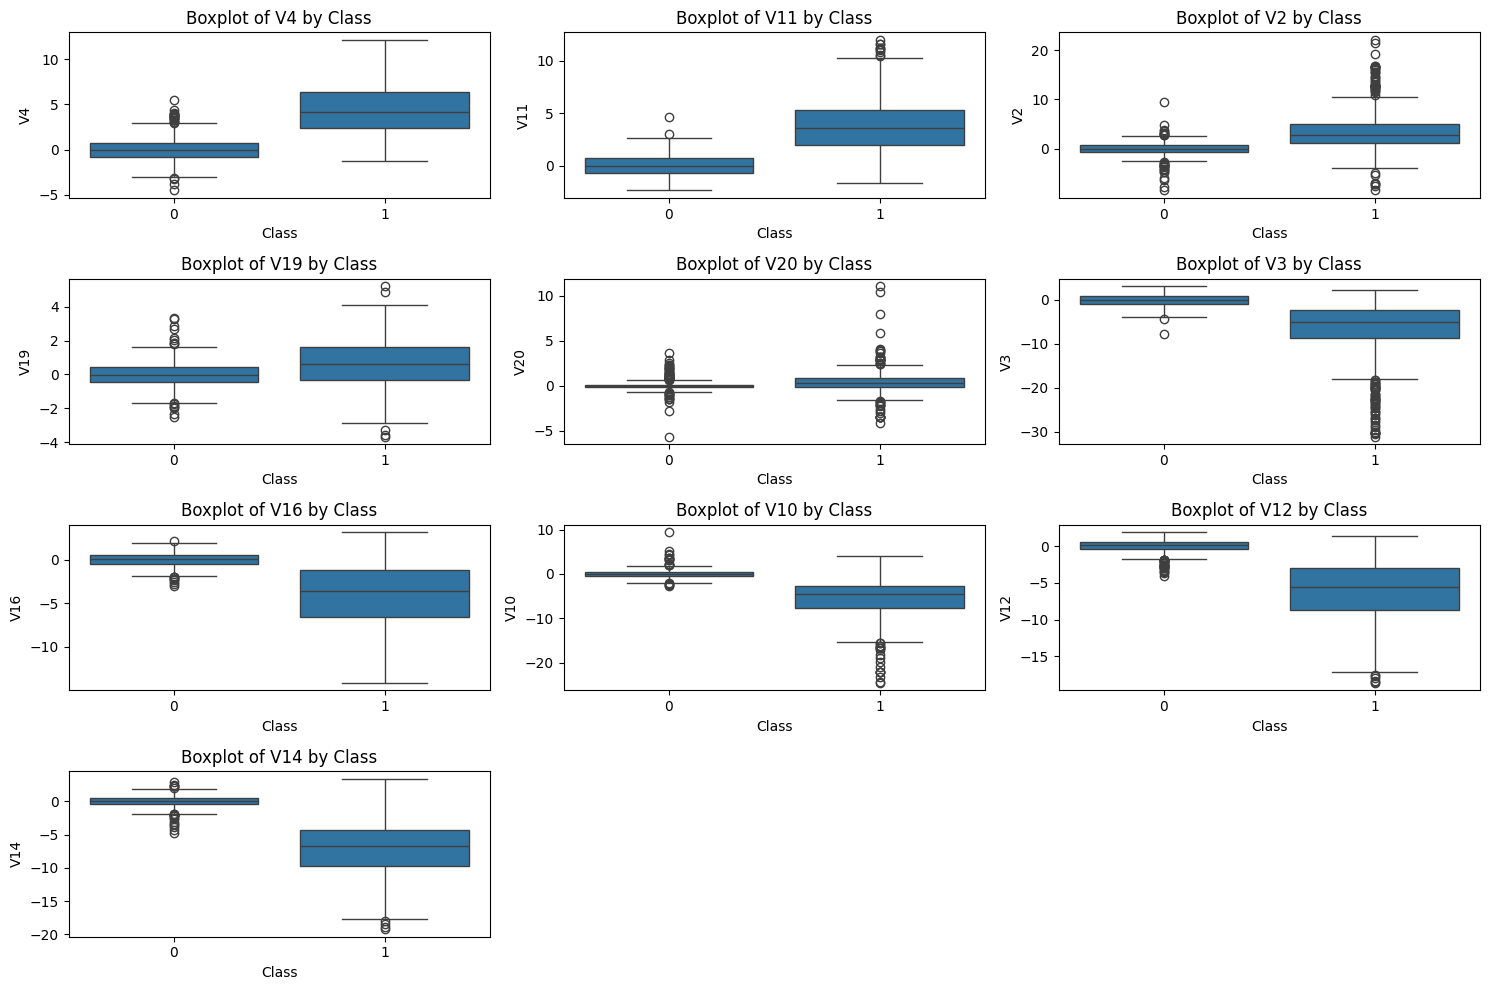

In [31]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Class', y=feature, data=subSample)
    plt.title(f'Boxplot of {feature} by Class')
plt.tight_layout()
plt.show()

In [32]:
def remove_outliers(df,feature):
    lower = df[feature].quantile(0.25)
    upper = df[feature].quantile(0.75)
    IQR = upper - lower
    lower_bound = lower - 1.5*IQR
    upper_bound = upper + 1.5*IQR
    return df[(df[feature]>=lower_bound) & (df[feature]<=upper_bound)]
    
for feature in features_to_check:
    df = remove_outliers(df,feature)

In [33]:
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for clarity
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Dimensionality Reduction

Original shape: (196975, 30)
Reduced shape: (196975, 23)


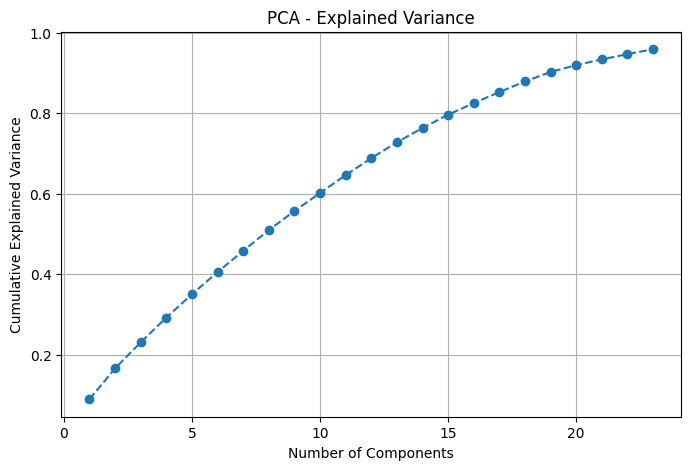

In [34]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cum_variance = explained_variance.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_variance)+1), cum_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid()
plt.show()

In [35]:
print(f"Number of components chosen: {pca.n_components_}")
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

print(df_pca.head())

Number of components chosen: 23
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.753627 -3.346923  0.072023 -0.528806 -0.097861  0.105001 -0.374775   
1 -0.213930 -0.832529 -1.552751 -1.148228  0.895862  0.807324  1.314242   
2  0.864613 -2.223751 -0.086895 -0.791533  1.155909 -1.113616 -0.639167   
3  1.550461 -2.360134  0.258588  0.571681 -0.961300  2.020669  1.549002   
4  1.969652 -1.526596 -1.560185 -0.285247 -0.099900  0.250211  0.529692   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0  0.651089 -0.501813  0.042800  ... -1.308090 -0.201660  0.644423  0.653375   
1 -1.127388 -0.257063 -0.502268  ...  0.617399 -0.296354 -1.084477  0.775318   
2 -0.844469  1.789936  2.213523  ...  0.260506 -0.463886 -1.444130  0.346940   
3  0.349309  0.475273 -0.057662  ... -0.012271 -0.444990  2.070250 -0.014148   
4 -1.219732 -0.055814 -0.252354  ...  0.593641 -0.183959 -1.004344  0.874908   

       PC18      PC19      PC20     

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (157580, 23) Test size: (39395, 23)


In [34]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    
    results.append([name, accuracy, precision, recall, f1, roc_auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])
print(results_df)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:23:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hp\AppData\Local\Prog

                 Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
0  Logistic Regression  0.999898        0.0     0.0       0.0  0.936730
1        Decision Tree  0.999797        0.0     0.0       0.0  0.499949
2        Random Forest  0.999898        0.0     0.0       0.0  0.496192
3              XGBoost  0.999898        0.0     0.0       0.0  0.932453
4                  SVM  0.999898        0.0     0.0       0.0  0.804321


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [36]:
X = df.drop("Class",axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

In [37]:
print("Befor SMOTE:")
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

Befor SMOTE:
(157580, 23)
(157580,)
Class
0    157565
1        15
Name: count, dtype: int64


In [38]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [39]:
print("After SMOTE:")
print(X_train_smote.shape)
print(y_train_smote.shape)
print(y_train_smote.value_counts())

After SMOTE:
(315130, 23)
(315130,)
Class
0    157565
1    157565
Name: count, dtype: int64


In [40]:
lr = LogisticRegression(class_weight="balanced", max_iter=1000, solver="liblinear", random_state=42)
lr.fit(X_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [41]:
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("\nLogistic Regression Results:")
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Results:
ROC AUC: 0.827993704145617
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.8627    0.9263     39391
           1     0.0006    0.7500    0.0011         4

    accuracy                         0.8626     39395
   macro avg     0.5003    0.8063    0.4637     39395
weighted avg     0.9999    0.8626    0.9262     39395

Confusion Matrix:
 [[33981  5410]
 [    1     3]]


In [46]:
brf = BalancedRandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees grow fully
    random_state=42,
    n_jobs=-1
)

# Train
brf.fit(X_train_smote, y_train_smote)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [47]:
y_pred = brf.predict(X_test)
y_prob = brf.predict_proba(X_test)[:, 1]

# Evaluation
roc_auc = roc_auc_score(y_test, y_prob)
print("Balanced Random Forest Results:")
print("ROC AUC:", roc_auc)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Balanced Random Forest Results:
ROC AUC: 0.5849083547003122
Classification Report:
              precision    recall  f1-score   support

           0     0.9999    1.0000    0.9999     39391
           1     0.0000    0.0000    0.0000         4

    accuracy                         0.9999     39395
   macro avg     0.4999    0.5000    0.5000     39395
weighted avg     0.9998    0.9999    0.9998     39395

Confusion Matrix:
[[39391     0]
 [    4     0]]


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

In [52]:
neg, pos = y_train_smote.value_counts()
n_nonfraud = (y_train_smote == 0).sum()
n_fraud = (y_train_smote == 1).sum()
scale_pos_weight = (n_nonfraud) / (n_fraud)
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train_smote, y_train_smote)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [53]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Results:")
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost Results:
ROC AUC: 0.800525500748902
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9990    0.9994     39391
           1     0.0000    0.0000    0.0000         4

    accuracy                         0.9989     39395
   macro avg     0.4999    0.4995    0.4997     39395
weighted avg     0.9998    0.9989    0.9993     39395

Confusion Matrix:
 [[39351    40]
 [    4     0]]


In [54]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# find best threshold (e.g. maximize F1)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print("Best threshold:", best_threshold)
print("Best Precision:", precisions[best_idx])
print("Best Recall:", recalls[best_idx])
print("Best F1:", f1_scores[best_idx])

# apply best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

print("\nClassification Report (Best Threshold):")
print(classification_report(y_test, y_pred_best, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best threshold: 0.0022887972
Best Precision: 0.000508646998982706
Best Recall: 0.5
Best F1: 0.001016258132150927

Classification Report (Best Threshold):
              precision    recall  f1-score   support

           0     0.9999    0.9002    0.9475     39391
           1     0.0005    0.5000    0.0010         4

    accuracy                         0.9002     39395
   macro avg     0.5002    0.7001    0.4742     39395
weighted avg     0.9998    0.9002    0.9474     39395

Confusion Matrix:
 [[35461  3930]
 [    2     2]]


In [40]:
svm = LinearSVC(class_weight="balanced", max_iter=10000, random_state=42)
svm_calibrated = CalibratedClassifierCV(svm, cv=5)

In [41]:
svm_calibrated.fit(X_train_smote, y_train_smote)
y_pred = svm_calibrated.predict(X_test)
y_proba = svm_calibrated.predict_proba(X_test)[:,1]

In [42]:
roc_auc = roc_auc_score(y_test, y_proba)
print("SVM Results:")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM Results:
ROC AUC: 0.8400903759742073
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.8618    0.9258     39391
           1     0.0006    0.7500    0.0011         4

    accuracy                         0.8618     39395
   macro avg     0.5003    0.8059    0.4634     39395
weighted avg     0.9999    0.8618    0.9257     39395

Confusion Matrix:
[[33948  5443]
 [    1     3]]


In [43]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
knn.fit(X_train_smote, y_train_smote)

,n_neighbors,5
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [106]:
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
print("KNN Results:")
print("ROC AUC:", roc_auc)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Results:
ROC AUC: 0.4996192023558681
Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9997    0.9998     39391
           1     0.0000    0.0000    0.0000         4

    accuracy                         0.9996     39395
   macro avg     0.4999    0.4998    0.4999     39395
weighted avg     0.9998    0.9996    0.9997     39395

Confusion Matrix:
[[39379    12]
 [    4     0]]


In [42]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)

param_grid = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["liblinear", "saga"],  # supports l1 and elasticnet
    "class_weight": [None, "balanced"],
    "l1_ratio": [0, 0.5, 1]  # only used if penalty='elasticnet'
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",   # focusing on ROC AUC for imbalance
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [43]:
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
720 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\AppData\Local\

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.0001, 0.001, ...], 'class_weight': [None, 'balanced'], 'l1_ratio': [0, 0.5, ...], 'penalty': ['l1', 'l2', ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [44]:
# Best params & score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

Best Parameters: {'C': 0.001, 'class_weight': None, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC: 0.9452627068719319


In [45]:
best_params = {'C': 0.001, 'class_weight': None, 'l1_ratio': 0, 
               'penalty': 'l2', 'solver': 'liblinear'}

# Train final logistic regression with best params
final_model = LogisticRegression(**best_params, max_iter=1000, random_state=42)

In [46]:
final_model.fit(X_train_smote, y_train_smote)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.001
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


Final Logistic Regression ROC AUC: 0.8350828869538727

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     39391
           1       0.00      0.75      0.00         4

    accuracy                           0.85     39395
   macro avg       0.50      0.80      0.46     39395
weighted avg       1.00      0.85      0.92     39395


Confusion Matrix:
[[33428  5963]
 [    1     3]]


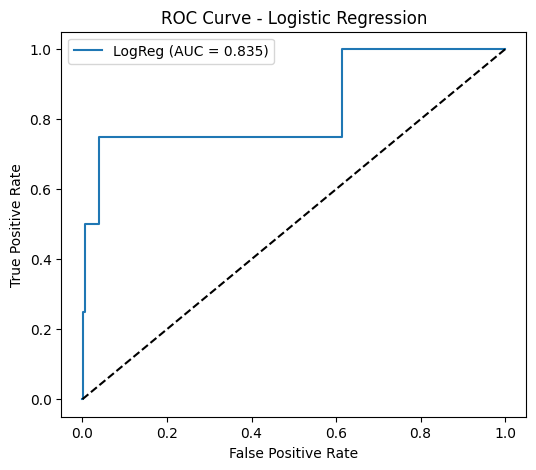

In [47]:
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:,1]

# Evaluation
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Final Logistic Regression ROC AUC:", roc_auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'LogReg (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [123]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base_svc = LinearSVC(random_state=42, max_iter=5000)

calibrated = CalibratedClassifierCV(estimator=base_svc, cv=3, method='sigmoid')

param_grid = {
    'estimator__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'estimator__loss': ['squared_hinge', 'hinge']
}

grid_svm = GridSearchCV(
    estimator=calibrated,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)


In [ ]:
grid_svm.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
print("Best SVM params:", grid_svm.best_params_)
print("Best CV ROC AUC (SVM):", grid_svm.best_score_)
best_svm = grid_svm.best_estimator_ 

In [48]:
sgd = SGDClassifier(loss="hinge", penalty="l2", random_state=42, max_iter=2000)

# Hyperparameter grid (much smaller than SVM)
param_grid = {
    "alpha": [1e-4, 1e-3, 1e-2],   # equivalent to 1/C
    "penalty": ["l2", "elasticnet"],
}

# Stratified CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(sgd, param_grid, scoring="roc_auc", cv=cv, n_jobs=-1)
grid.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best ROC AUC (CV):", grid.best_score_)


Best Parameters: {'alpha': 0.0001, 'penalty': 'elasticnet'}
Best ROC AUC (CV): 0.9322465861745509


In [49]:
best_sgd = grid.best_estimator_
calibrated_sgd = CalibratedClassifierCV(best_sgd, method="sigmoid", cv=3)
calibrated_sgd.fit(X_train_smote, y_train_smote)

# Evaluate on hold-out test set
y_pred = calibrated_sgd.predict(X_test)
y_proba = calibrated_sgd.predict_proba(X_test)[:, 1]

print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC AUC: 0.8133647279835495
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     39391
           1       0.00      0.75      0.00         4

    accuracy                           0.85     39395
   macro avg       0.50      0.80      0.46     39395
weighted avg       1.00      0.85      0.92     39395

Confusion Matrix:
[[33495  5896]
 [    1     3]]


In [53]:
log_reg_best = LogisticRegression(
    C=1.0, 
    penalty='l2', 
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)
sgd_best = SGDClassifier(
    alpha=0.0001,
    penalty='elasticnet',
    loss='log_loss',  # logistic loss
    class_weight='balanced',
    random_state=42
)
ensemble = VotingClassifier(
    estimators=[('lr', log_reg_best), ('sgd', sgd_best)],
    voting='soft'
)

In [54]:
ensemble.fit(X_train, y_train)

,estimators,"[('lr', ...), ('sgd', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [55]:
y_pred = ensemble.predict(X_test)
y_pred_proba = ensemble.predict_proba(X_test)[:, 1]

# evaluation
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", roc_auc)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

ROC AUC: 0.8233098931227946
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     39391
           1       0.00      0.75      0.00         4

    accuracy                           0.73     39395
   macro avg       0.50      0.74      0.42     39395
weighted avg       1.00      0.73      0.84     39395

Confusion Matrix:
[[28699 10692]
 [    1     3]]


In [58]:
y_proba = ensemble.predict_proba(X_test)[:, 1]

best_threshold = 0.5
best_f1 = 0
best_metrics = None

# Sweep thresholds from 0.001 to 0.5
for thresh in np.linspace(0.001, 0.5, 500):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary', zero_division=0)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh
        best_metrics = (precision, recall, f1)

print(f"Best threshold: {best_threshold:.6f}")
print(f"Precision: {best_metrics[0]:.4f}, Recall: {best_metrics[1]:.4f}, F1: {best_metrics[2]:.4f}")

# Evaluate final confusion matrix at best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best threshold: 0.500000
Precision: 0.0003, Recall: 0.7500, F1: 0.0006
Confusion Matrix:
 [[28699 10692]
 [    1     3]]
